In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

'''
Try to use Zack's ON/OFF clusters to match with original data, grab index numbers.
Use Pearson Correlation to get matches from representative calcium traces, 4 motor clusters
Explore Neuropal dataset, so verify cell id of hypothesized clusters
'''

"\nTry to use Zack's ON/OFF clusters to match with original data, grab index numbers.\nUse Pearson Correlation to get matches from representative calcium traces, 4 motor clusters\nExplore Neuropal dataset, so verify cell id of hypothesized clusters\n"

In [2]:
stimulus = np.load('ProcAiryData/inpfull_op50_SF.npz')

In [3]:
stimulus_concat = np.concatenate([ stimulus['arr_0'], stimulus['arr_1'], stimulus['arr_2'], stimulus['arr_3'], stimulus['arr_4'], stimulus['arr_5'], stimulus['arr_6']], axis =1)

In [17]:

ON_cells = np.load('ProcAiryData/Yop50_SF_psON.npz')
OFF_cells = np.load('ProcAiryData/Yop50_SF_psOFF.npz')

Y_full = np.load('ProcAiryData/Yfull_op50_SF.npz')

In [51]:

#Exploring the Neuropal data

neuropal = np.load('ProcAiryData/Yfull_Neuropal.npz')

In [53]:
neuropal.keys()

KeysView(NpzFile 'ProcAiryData/Yfull_Neuropal.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...)

In [52]:
neuropal['arr_0'][:,0].shape

(1600,)

In [7]:
Y_full_concat = np.concatenate([Y_full['arr_0'],
                         Y_full['arr_1'],
                         Y_full['arr_2'],
                         Y_full['arr_3'] , Y_full['arr_4'], Y_full['arr_5'], Y_full['arr_6']], axis =1)

Y_full_df = pd.DataFrame(Y_full_concat)


# all_worms = np.concatenate([bacteria['arr_0'], bacteria['arr_1'], bacteria['arr_2'],
#                             bacteria['arr_3'], bacteria['arr_4'], bacteria['arr_5'],
#                             bacteria['arr_6']], axis=1)

In [8]:
column = [0] * len(Y_full['arr_0'].T) + [1] * len(Y_full['arr_1'].T) + [2] * len(Y_full['arr_2'].T) + [3] * len(Y_full['arr_3'].T) + [4] * len(Y_full['arr_4'].T) + [5] * len(Y_full['arr_5'].T) + [6] * len(Y_full['arr_6'].T)
worm_id = np.array(column)

In [9]:
Y_full_df.shape

(1600, 948)

In [10]:
Y_full_df = Y_full_df.T

In [11]:
Y_full_df['worm_id'] = worm_id


In [12]:
Y_full_df

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,worm_id
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010324,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.449743,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.362794,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016547,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.360048,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.791626,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.817934,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.806628,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.325846,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6


In [13]:
#add stimulus group to Y_full_df
stim_g = [0] * len(Y_full['arr_0'].T) + [0] * len(Y_full['arr_1'].T) + [1] * len(Y_full['arr_2'].T) + [1] * len(Y_full['arr_3'].T) + [1] * len(Y_full['arr_4'].T) + [1] * len(Y_full['arr_5'].T) + [0] * len(Y_full['arr_6'].T)
stim_group = np.array(stim_g)

In [14]:
Y_full_df['stim_group'] = stim_group

In [15]:
Y_full_df

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


In [18]:
sensory_concat = np.concatenate([ON_cells['arr_0'], ON_cells['arr_1'], ON_cells['arr_2'], ON_cells['arr_3'], ON_cells['arr_4'], ON_cells['arr_5'], ON_cells['arr_6'],
                                  OFF_cells['arr_0'], OFF_cells['arr_1'], OFF_cells['arr_2'], OFF_cells['arr_3'], OFF_cells['arr_4'], OFF_cells['arr_5'], OFF_cells['arr_6']], axis = 1)

sensory_df = pd.DataFrame(sensory_concat)

In [19]:
Y_full_df.shape

(948, 1602)

In [20]:
sensory_df.shape

(1600, 51)

In [22]:
# Merge the DataFrames on columns 'A' and 'B'
merged_df = pd.merge(Y_full_df.iloc[:, : -2], sensory_df.T, how='outer', indicator = True)

# Display the merged DataFrame
print(merged_df)



left_only = merged_df[merged_df['_merge'] == 'left_only']


       0         1         2         3         4         5         6  \
0    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..   ...       ...       ...       ...       ...       ...       ...   
943  1.0  0.989704  0.944525  0.908084  0.843754  0.864612  0.837278   
944  1.0  0.991301  0.970714  0.913606  0.962348  0.770225  0.882988   
945  1.0  0.992013  0.957409  0.922561  0.777735  0.658081  0.529483   
946  1.0  0.992437  0.915646  0.869705  0.818588  0.865677  0.879607   
947  1.0  0.999326  0.896468  0.921065  0.925678  0.642147  0.890337   

            7         8         9  ...      1591      1592      1593  \
0    0.000000  0.000000  0.000000  ...  0.505346  0.511284  0.4

In [24]:
both = merged_df[merged_df['_merge'] == 'both']

In [25]:
both

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,_merge
92,0.007268,0.010954,0.037007,0.002865,0.020688,0.024091,0.016025,0.086438,0.027677,0.065741,...,0.000000,0.092301,0.000000,0.087930,0.000000,0.064883,0.112134,0.160932,0.000000,both
141,0.042902,0.061919,0.038616,0.020661,0.063261,0.042086,0.042280,0.043554,0.063474,0.029278,...,0.327123,0.268349,0.265157,0.287717,0.259648,0.283492,0.231142,0.255243,0.201483,both
143,0.044767,0.034356,0.054277,0.060201,0.064883,0.034744,0.045008,0.051906,0.079890,0.073879,...,0.009675,0.019260,0.010417,0.014744,0.000000,0.010609,0.025992,0.030069,0.026731,both
157,0.051226,0.097647,0.104268,0.114717,0.098219,0.079975,0.070228,0.074329,0.068534,0.068865,...,0.047185,0.045663,0.012079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000409,both
166,0.058262,0.086767,0.081537,0.076845,0.070099,0.081335,0.054870,0.060780,0.080764,0.076667,...,0.021008,0.003032,0.000000,0.012079,0.016968,0.020956,0.017370,0.014025,0.015286,both
169,0.059893,0.077135,0.078309,0.074547,0.087966,0.068480,0.106638,0.063616,0.110894,0.078691,...,0.253618,0.229370,0.231311,0.239211,0.195642,0.191159,0.210878,0.195020,0.195396,both
174,0.067608,0.076400,0.083592,0.069296,0.086243,0.072263,0.073743,0.054932,0.059659,0.081850,...,0.079332,0.095291,0.106757,0.142643,0.171139,0.212862,0.268534,0.178100,0.120161,both
185,0.073245,0.078041,0.101136,0.097770,0.070143,0.089184,0.103075,0.072258,0.083143,0.090620,...,0.107907,0.135058,0.149525,0.186902,0.225515,0.251903,0.245917,0.210967,0.172567,both
192,0.077771,0.050388,0.038936,0.063386,0.057993,0.087070,0.068161,0.045648,0.060495,0.052107,...,0.070857,0.074979,0.084153,0.108473,0.132419,0.153624,0.178262,0.162290,0.148391,both
194,0.080219,0.064809,0.066301,0.031171,0.053962,0.069359,0.059205,0.064676,0.084366,0.110546,...,0.058153,0.058390,0.041855,0.037438,0.039988,0.052700,0.059330,0.046315,0.044140,both


In [26]:
index_array = np.array(both.index)

In [54]:
index_array

array([ 92, 141, 143, 157, 166, 169, 174, 185, 192, 194, 209, 214, 232,
       248, 256, 258, 262, 273, 275, 276, 286, 292, 302, 312, 313, 316,
       323, 333, 339, 340, 343, 356, 369, 375, 406, 444, 445, 449, 454,
       460, 487, 580, 588, 598, 617, 625, 633, 636, 643, 758, 899])

In [28]:

# Create a mask where True indicates indices NOT to be removed
mask = ~Y_full_df.index.isin(index_array)

# Filter the DataFrame to keep only rows not in index_array
Y_full_filtered = Y_full_df[mask]

# Print the updated DataFrame
Y_full_filtered.shape


(897, 1602)

In [29]:
Y_full_filtered

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


In [30]:

# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 0

# Filter the DataFrame using the mask
worm_filter0 = Y_full_filtered[worm_mask]

In [31]:
worm_filter0.shape

(132, 1602)

In [32]:
# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 1

# Filter the DataFrame using the mask
worm_filter1 = Y_full_filtered[worm_mask]

In [33]:
# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 6

# Filter the DataFrame using the mask
worm_filter6 = Y_full_filtered[worm_mask]

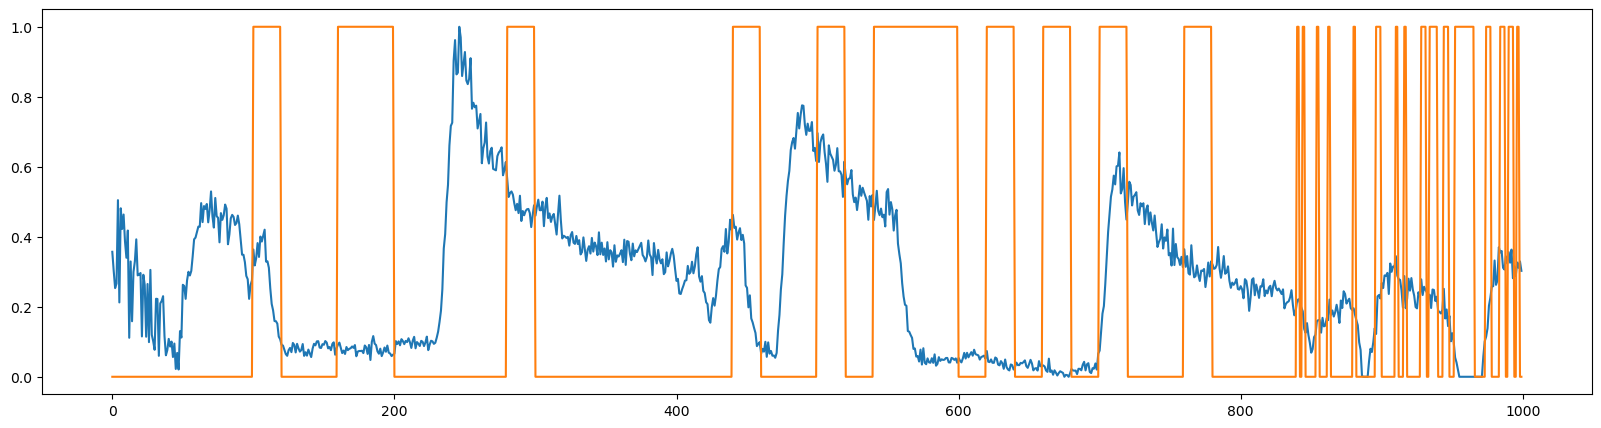

In [65]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(range (1000), worm_filter0.iloc[10, 0: 1000])
ax.plot( stimulus['arr_0'][0: 1000])





In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))

In [ ]:
#try adjusting stimlus to timescale of 1 tick per second
adj_stim = stimulus['arr_2'] * (2/3)

In [ ]:
# 6,  9, 34, 35, 41, 58
fig, ax = plt.subplots(figsize = (30, 5))
ax.plot(range (1200), worm_filter2.iloc[58, 0: 1200])
ax.plot( stimulus['arr_2'][0: 1200])

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(range (1600), yanno['arr_1'][: , 0])
ax.plot(stimulus['arr_2'])

In [ ]:
correlations_2_rme = []
for i in range(0, worm_filter2.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter2.iloc[75, :], worm_filter2.iloc[i, :])
    correlations_2_rme.append((i, corr))  # Store tuple of (row index, correlation)

In [ ]:
correlations_2_rme = np.array(correlations_2_rme)

correlations_2_rme

In [ ]:
correlations_2_rme = np.array(correlations_2_rme[:, 1])


correlations_2_rme

In [ ]:
RME_high_2 = np.where(correlations_2_rme >= 0.7)
RME_high_2

In [ ]:
AVA_2 = np.where(correlations_2_rme <= -0.6)
AVA_2

In [ ]:
correlations_3_rme = []
for i in range(0, worm_filter3.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter3.iloc[0, :], worm_filter3.iloc[i, :])
    correlations_3_rme.append((i, corr))  # Store tuple of (row index, correlation)
 





In [ ]:
correlations_3_rme = np.array(correlations_3_rme)

correlations_3_rme

In [ ]:
correlations_3_rme = np.array(correlations_3_rme[:, 1])


correlations_3_rme

In [ ]:
RME_high_3 = np.where(correlations_3_rme >= 0.8)
RME_high_3

In [ ]:
AVA_3 = np.where(correlations_3_rme <= -0.55)
AVA_3

In [ ]:
correlations_4_rme = []
for i in range(0, worm_filter4.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter4.iloc[37, :], worm_filter4.iloc[i, :])
    correlations_4_rme.append((i, corr))  # Store tuple of (row index, correlation)
correlations_4_rme[0]

In [ ]:
correlations_4_rme = np.array(correlations_4_rme)

In [ ]:
correlations_4_rme = np.array(correlations_4_rme[:, 1])


correlations_4_rme

In [ ]:
RME_high_4 = np.where(correlations_4_rme >= 0.9)
RME_high_4

In [ ]:
AVA4 = np.where(correlations_4_rme <= -0.50)
AVA4

In [ ]:
correlations_5_rme = []
for i in range(0, worm_filter5.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter5.iloc[6, :], worm_filter5.iloc[i, :])
    correlations_5_rme.append((i, corr))  # Store tuple of (row index, correlation)
correlations_5_rme[0]

In [ ]:
correlations_5_rme = np.array(correlations_5_rme)

# RME_high_5 = np.where(correlations_5_rme >= 0.4)
# RME_high_5
correlations_5_rme.shape 

In [ ]:
correlations_5_rme = np.array(correlations_5_rme[:, 1])

In [ ]:
RME_high_5 = np.where(correlations_5_rme >= 0.70)
RME_high_5

In [ ]:
AVA_5 = np.where(correlations_5_rme <= -0.50)
AVA_5

In [ ]:
type(worm_filter4)

In [ ]:
#set column name:
worm_filter4.loc[RME_high_4]['Cluster'] = 'RME'
worm_filter4.loc[AVA4]['Cluster'] = 'AVA'
worm_filter5.loc[RME_high_5]['Cluster'] = 'RME'
worm_filter5.loc[AVA_5]['Cluster'] = 'AVA'
worm_filter3.loc[RME_high_3]['Cluster'] = 'RME'
worm_filter3.loc[AVA_3]['Cluster'] = 'AVA'
worm_filter2.loc[RME_high_2]['Cluster'] = 'RME'
worm_filter2.loc[AVA_2]['Cluster'] = 'AVA'

In [ ]:
worm_filter4.iloc[RME_high_4]

In [ ]:
#stim1 AVA and RME, add a column to the dataframes to indicate the cluster
stim_1_AVA_RME = pd.concat([worm_filter4.iloc[RME_high_4], worm_filter4.iloc[AVA4], worm_filter5.iloc[RME_high_5], worm_filter5.iloc[AVA_5], worm_filter3.iloc[RME_high_3], worm_filter3.iloc[AVA_3], worm_filter2.iloc[RME_high_2], worm_filter2.iloc[AVA_2]],  axis = 0)



In [ ]:
#create new column for ava+rme to set labels
clust_labs_AVA_RME_stim1 = ['RME'] * len(worm_filter4.iloc[RME_high_4]) + \
                           ['AVA'] * len(worm_filter4.iloc[AVA4]) + \
                           ['RME'] * len(worm_filter5.iloc[RME_high_5]) + \
                           ['AVA'] * len(worm_filter5.iloc[AVA_5]) + \
                           ['RME'] * len(worm_filter3.iloc[RME_high_3]) + \
                           ['AVA'] * len(worm_filter3.iloc[AVA_3]) + \
                           ['RME'] * len(worm_filter2.iloc[RME_high_2]) + \
                           ['AVA'] * len(worm_filter2.iloc[AVA_2])

In [ ]:
%store clust_labs_AVA_RME_stim1

In [ ]:
%store stim_1_AVA_RME

In [ ]:
#stim0 AVA and RME

stim_1_AVA_RME

In [ ]:
index_values = stim_1_AVA_RME.index.tolist()

In [ ]:
index_values

In [ ]:
Y_full_stim1_AVA_RME = Y_full_filtered.iloc[index_values]

In [ ]:
= np.array(Y_full_stim1_AVA_RME[0])